In [1]:
import os
os.chdir("../")
from algoritmo_genetico.pos import *
os.chdir("journal")
from plotly import express as px
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns
from matplotlib import patches
import matplotlib

from networkx.algorithms import approximation, assortativity,centrality, cluster, distance_measures, link_analysis, smallworld
from networkx.classes import function
from networkx.algorithms.community.quality import modularity

def hausdorff_normalized(p,q):
    T=q.shape[1]
    from scipy.spatial.distance import directed_hausdorff
    return max(directed_hausdorff(p,q)[0],directed_hausdorff(q,p)[0])/np.sqrt(T)

def diferencia(a):
    return abs(a[0]-a[1])


In [2]:
vertices,edges=read("10Comunidades.graph")
grado_grupo =np.array([[len(vertice[2:]),vertice[1]] for vertice in vertices])
V=pd.DataFrame(grado_grupo,columns=['Grade','Group']).astype({'Grade': 'int64'})

Homofilia 0.9020061728395061
------------------------------
Asortatividad 0.8904531863724507
------------------------------
Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 3888
Average degree:   7.7760
average clustering coefficient of G: 0.134
Densidad de G: 0.007783783783783783
degree assortativity:-0.08498079965910046
Coeficiente de agrupamiento de G:0.13011818693439955
Diametro de G:9
Modularity of G:0.7965445342533063


/home/cpulido/anaconda3/envs/pos/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



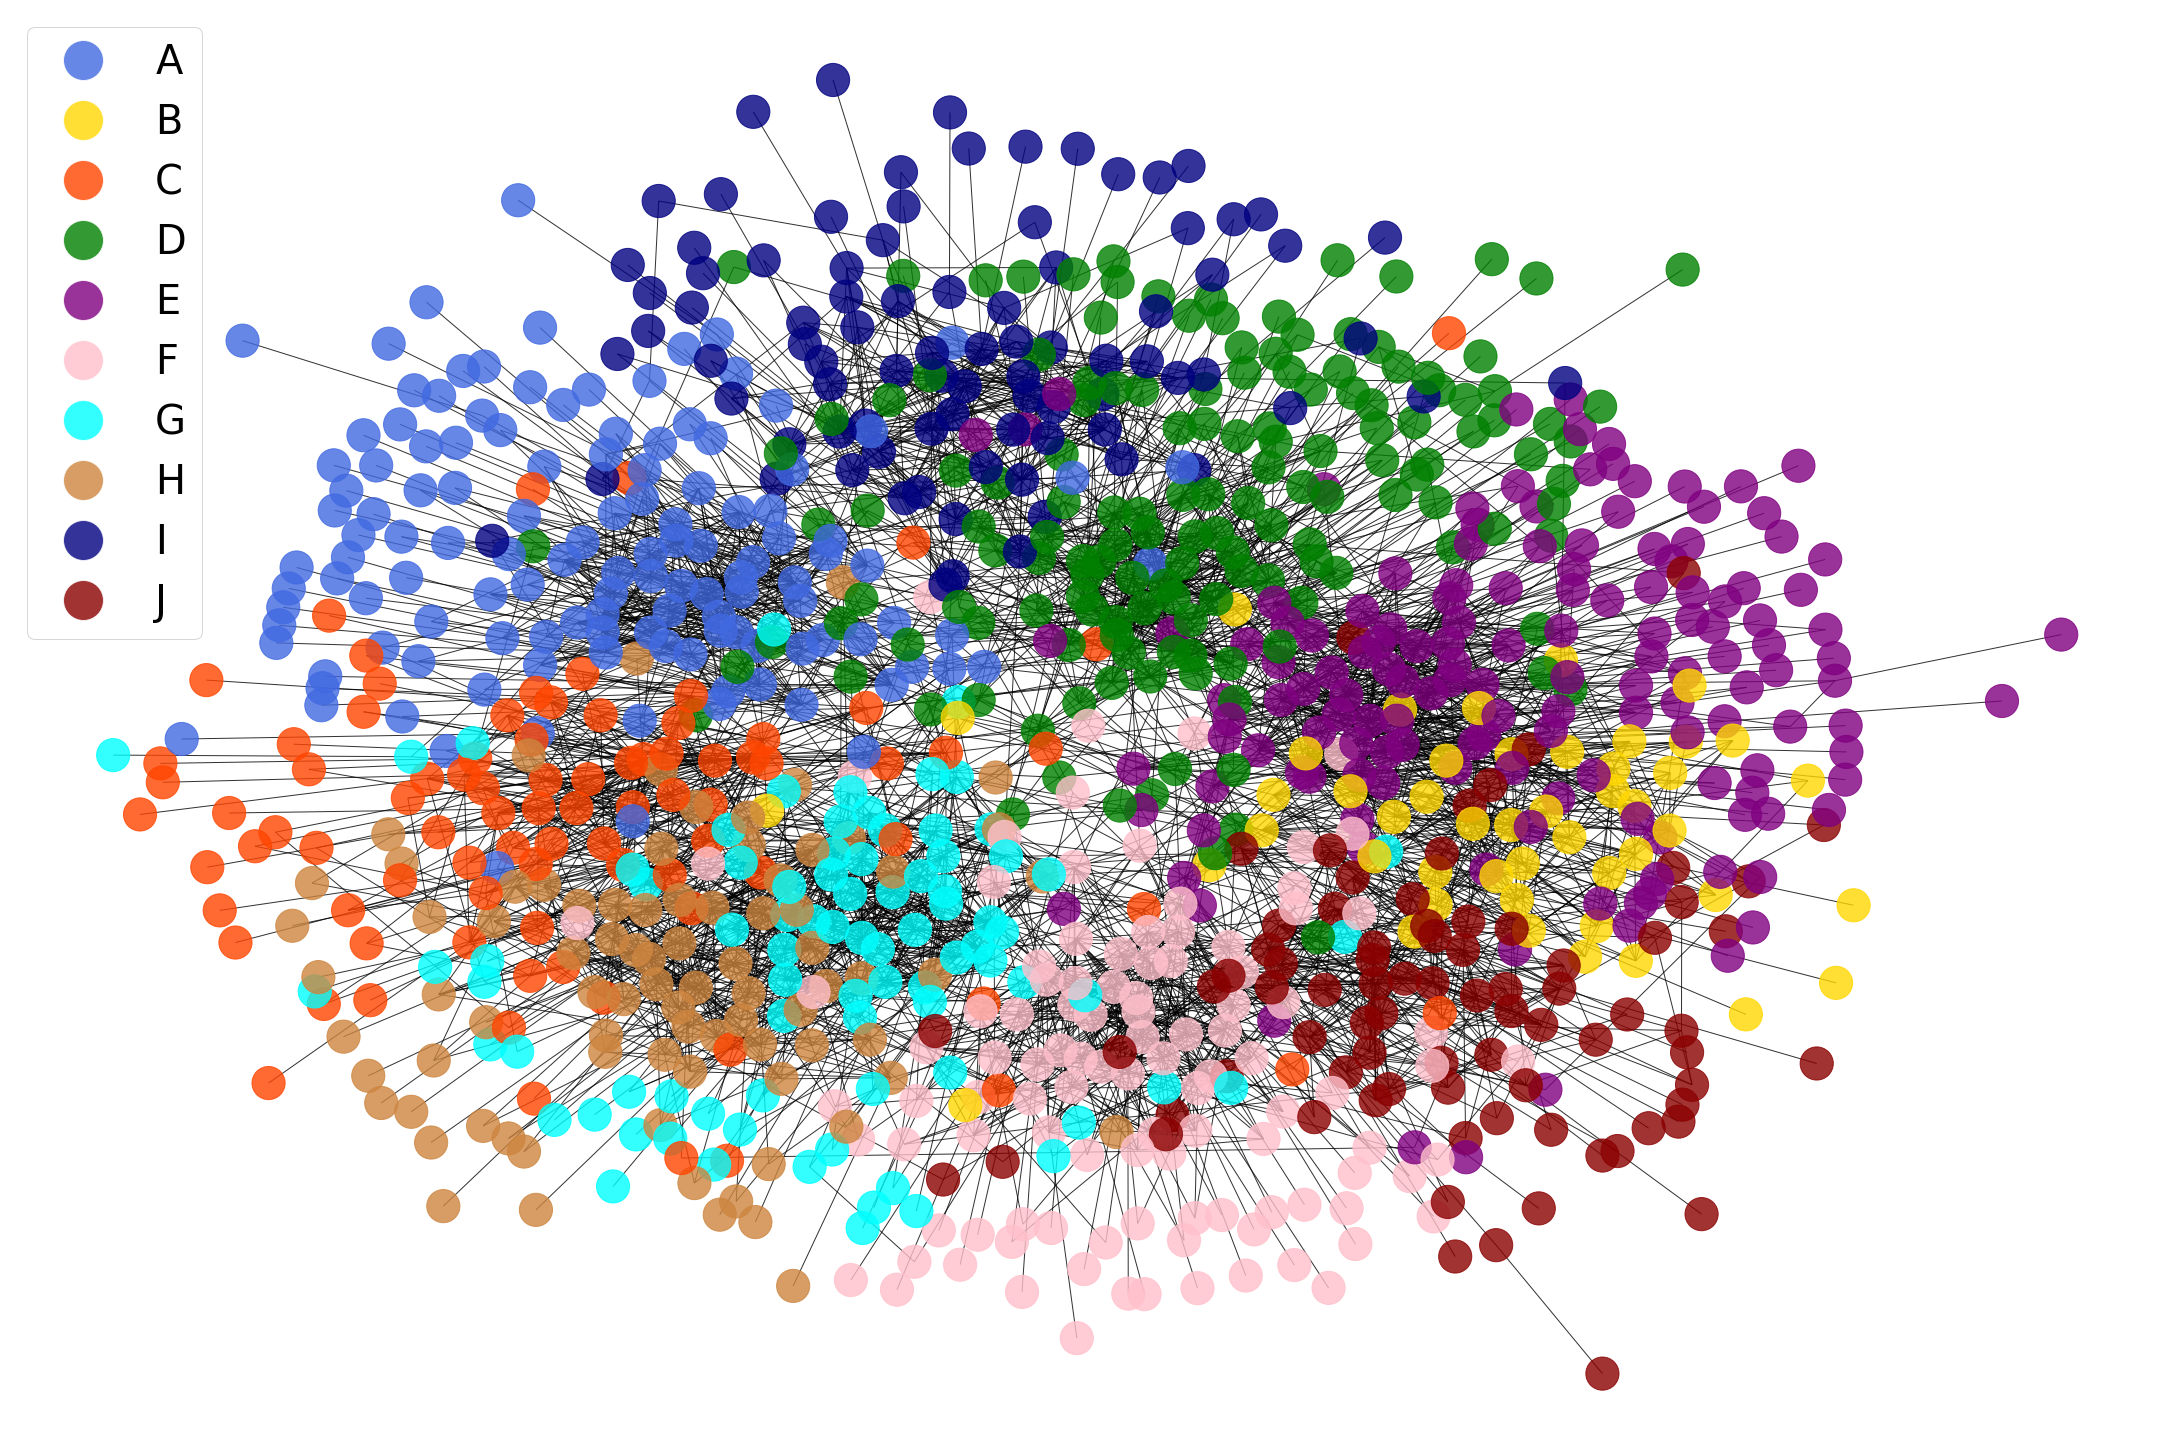

In [3]:
G=convert_vertices_to_graph(vertices,edges)

print("Homofilia",homofilia(G))
print("-"*30)
print("Asortatividad",assor(G))
print("-"*30)
print(function.info(G))
print("average clustering coefficient of G: "+str(approximation.average_clustering(G)))
print("Densidad de G: "+str(function.density(G)))
print("degree assortativity:"+str(assortativity.degree_assortativity_coefficient(G)))
print("Coeficiente de agrupamiento de G:"+str(cluster.average_clustering(G)))
print("Diametro de G:"+str(distance_measures.diameter(G)))
#print("Coeficiente de Small World: " + str(smallworld.sigma(G))) #A graph is commonly classified as small-world if sigma>1.
comm=[]
for g in letras:
    comm.append({i for i in V[V.Group == g].index})
print("Modularity of G:"+str(modularity(G,comm)))
draw_graph(G,np.ones(len(vertices)),crime=10,save=True,file="graficas/10_comm.pdf")

In [4]:
# parametros modelo
modelo='g_m_v'
T=300
psi=0.98
nu=0.8
mu=0.14
start=0.05
lamda={l:i for l,i in zip(letras,np.arange(start=start,stop=start+0.05*10,step=0.05))}
crimen=10

In [5]:
lamda

{'A': 0.05,
 'B': 0.1,
 'C': 0.15000000000000002,
 'D': 0.2,
 'E': 0.25,
 'F': 0.3,
 'G': 0.35000000000000003,
 'H': 0.4,
 'I': 0.45,
 'J': 0.5}

In [6]:
s0=np.random.rand(len(vertices))

In [7]:
from itertools import combinations
grupos={a:a for a in letras}
comb=list(combinations(grupos,2))
modelo='g_m_v'
Distances=[]

S=generate(vertices,psi=psi,nu=nu,mu=mu,T=T,s=s0,lamda=lamda,modelo=modelo)[0].T

for c in comb:
    Distances.append([hausdorff_normalized(S[V.Group == grupos[c[0]]],
                                          S[V.Group == grupos[c[1]]]),
                     grupos[c[0]]+"-"+grupos[c[1]],'Community Structure']
                    )
Distances_c=pd.DataFrame(Distances,columns=['Hausdorff Distance','Combination','model'])

In [8]:
modelo='random'

In [9]:
from itertools import combinations
grupos={a:a for a in letras}
comb=list(combinations(grupos,2))
modelo='g_m_v'
Distances=[]

S=generate(vertices,psi=psi,nu=nu,mu=mu,T=T,s=s0,lamda=lamda,modelo=modelo)[0].T

for c in comb:
    Distances.append([hausdorff_normalized(S[V.Group == grupos[c[0]]],
                                          S[V.Group == grupos[c[1]]]),
                     grupos[c[0]]+"-"+grupos[c[1]],'Random']
                    )
Distances_r=pd.DataFrame(Distances,columns=['Hausdorff Distance','Combination','model'])

In [10]:
Distances=pd.concat([Distances_c,Distances_r])

In [11]:
def get_index(row):
    l1,l2=row[1].split("-")
    row_index = np.where(np.array(letras) == l1)[0][0]*3
    col_index = np.where(np.array(letras) == l2)[0][0]*3
    if row[2] == 'Random':
        row_index+=1
    return row_index,col_index

In [12]:
get_index(Distances.values[0])

(0, 3)

In [13]:
Data=np.zeros((len(letras)*3-1,len(letras)*3-1))

In [14]:
for row in Distances.values:
    index=get_index(row)
    Data[index[0]][index[1]]=row[0]
    Data[index[0]][index[1]+1]=row[0]
    
ticks=[]
for i in letras:
    ticks.append("")
    ticks.append(i)
    ticks.append("")

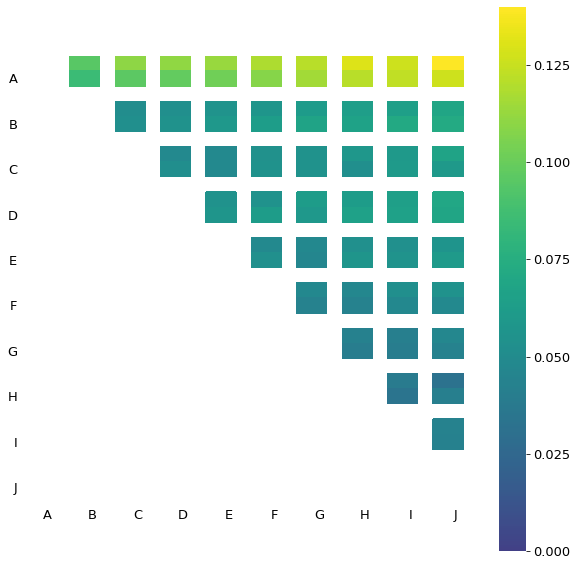

In [39]:
font = {'size'   : 13}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(10,10))
midpoint = (Distances['Hausdorff Distance'].max() - Distances['Hausdorff Distance'].min()) / 2
sns.heatmap(Data,square=True,mask=~(Data!=0),xticklabels=ticks,
            yticklabels=ticks,cmap='viridis', center=midpoint )
plt.yticks(rotation='horizontal')
plt.tick_params(right= False,top= False,left= False, bottom= False)
plt.savefig("/home/cpulido/Desktop/10_.svg")
plt.show()